# Sandbox (development)

In [10]:
# imports
from matplotlib import pyplot as plt

from astropy import units

from frb.surveys import survey_utils
from frb import frb

# DES near 180924

In [3]:
frb180924 = frb.FRB.by_name('FRB180924')

In [5]:
search_r = 1 * units.deg

In [8]:
des_srvy = survey_utils.load_survey_by_name('DES', frb180924.coord, search_r)
des_tbl = des_srvy.get_catalog(print_query=True)

SELECT mag_auto_g, magerr_auto_g, mag_auto_r, magerr_auto_r, mag_auto_i, magerr_auto_i, mag_auto_z, magerr_auto_z, mag_auto_y, magerr_auto_y, coadd_object_id, ra, dec, tilename
    FROM des_dr1.main
    WHERE q3c_radial_query(ra,dec,326.105229,-40.900028,1.000000)
    
SELECT w1mpro, w1sigmpro, w2mpro, w2sigmpro, w3mpro, w3sigmpro, w4mpro, w4sigmpro, coadd_object_id, des_ra, des_dec, ra, dec
    FROM des_dr1.des_allwise
    WHERE q3c_radial_query(ra,dec,326.105229,-40.900028,1.000000)
    


## Inspect

In [11]:
des_tbl

DES_g,DES_g_err,DES_r,DES_r_err,DES_i,DES_i_err,DES_z,DES_z_err,DES_Y,DES_Y_err,DES_ID,ra,dec,DES_tile,WISE_W1,WISE_W1_err,WISE_W2,WISE_W2_err,WISE_W3,WISE_W3_err,WISE_W4,WISE_W4_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str12,float64,float64,float64,float64,float64,float64,float64,float64
22.4551,0.0337882,22.157,0.0371656,22.0062,0.0646035,21.3684,0.059213,22.0598,0.258294,212833823,324.8499,-41.2165,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
23.194,0.0941275,21.9697,0.0437027,21.5887,0.0569069,21.1987,0.0581137,21.1634,0.150334,212835313,324.871578,-41.235802,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
99.0,99.0,99.0,99.0,23.9364,0.253412,23.1386,0.178016,22.8145,0.353177,212835513,324.873778,-41.23811,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
24.8797,0.26971,24.4296,0.255416,24.034,0.328238,23.7537,0.371262,24.2944,1.63749,212835530,324.87687,-41.238287,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
26.0055,0.67688,24.9813,0.377289,24.5795,0.483049,24.5982,0.719402,24.5932,1.91446,212835629,324.875746,-41.239355,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
26.3789,1.36246,24.8452,0.475733,23.641,0.290254,22.8861,0.212203,23.7033,1.20404,212835429,324.875066,-41.237232,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
24.15,0.188705,23.4247,0.139917,22.7707,0.159046,23.1424,0.270389,22.4796,0.409255,212834367,324.850547,-41.22363,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
24.8818,0.340645,23.5702,0.147674,22.3547,0.0857534,21.7181,0.0889664,21.5545,0.17698,212833707,324.854527,-41.215133,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
23.9999,0.191154,23.1957,0.135181,22.8573,0.172216,22.8658,0.323857,22.7156,0.652205,212833861,324.861541,-41.216964,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [14]:
gd_r = des_tbl['DES_r'] < 30.

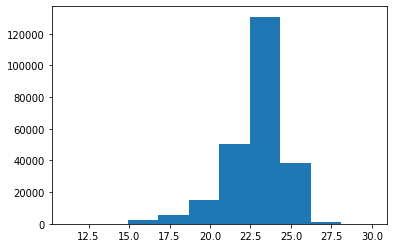

In [15]:
plt.clf()
ax = plt.gca()
ax.hist(des_tbl['DES_r'][gd_r])
plt.show()

# Write

In [17]:
des_tbl.meta['RA'] = frb180924.coord.ra.value
des_tbl.meta['DEC'] = frb180924.coord.dec.value
des_tbl.meta['RSEARCH'] = 1.0

In [18]:
des_tbl.write('tst_DES_180924.fits', overwrite=True)